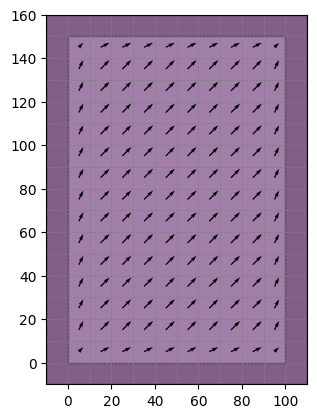

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from nsfdpy.grid import StaggeredGrid
from nsfdpy.field import ScalarField, VectorField
from nsfdpy.typing import BCondition
from nsfdpy.plot import ScalarFieldPlot, StaggeredGridPlot, VectorFieldPlot
from nsfdpy.bcond import NoSlipWBCond, NoSlipEBCond, NoSlipNBCond, NoSlipSBCond


geom_data = {
    "imax": 10,
    "jmax": 15,
    "xlength": 100,
    "ylength": 150
}

prob_data = {
    "Re": 1000,
    "PI": 0.0,
    "UI": 0.5,
    "VI": 0.5,
    "wW": BCondition.NO_SLIP,
    "wE": BCondition.NO_SLIP,
    "wN": BCondition.NO_SLIP,
    "wS": BCondition.NO_SLIP,
}

grid = StaggeredGrid(geom_data)
pressure = ScalarField(geom_data["imax"], geom_data["jmax"], prob_data["PI"])
vel = VectorField(geom_data["imax"], geom_data["jmax"], (prob_data["UI"], prob_data["VI"]))

w_bcond = NoSlipWBCond(grid)
e_bcond = NoSlipEBCond(grid)
n_bcond = NoSlipNBCond(grid)
s_bcond = NoSlipSBCond(grid)

w_bcond(vel, pressure)
e_bcond(vel, pressure)
n_bcond(vel, pressure)
s_bcond(vel, pressure)

grid_plot = StaggeredGridPlot(grid)
p_plot = ScalarFieldPlot(grid)
vel_plot = VectorFieldPlot(grid)

fig, ax = plt.subplots()
grid_plot.cells(ax, True)
p_plot.pcolormesh(pressure, ax, True, alpha=0.5)
vel_plot.quiver(vel, ax=ax)
ax.set_aspect('equal', 'box')

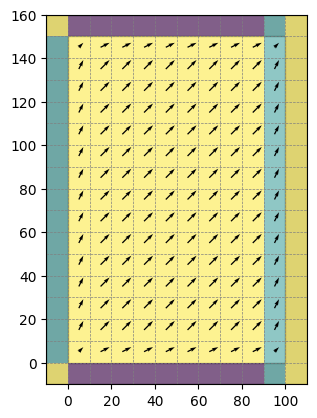

In [2]:
fig, ax = plt.subplots()
grid_plot.cells(ax, True)
vel_plot.pcolormesh(vel, "u", ax=ax, boundary=True, alpha=0.5)
vel_plot.quiver(vel, ax=ax)
ax.set_aspect('equal', 'box')

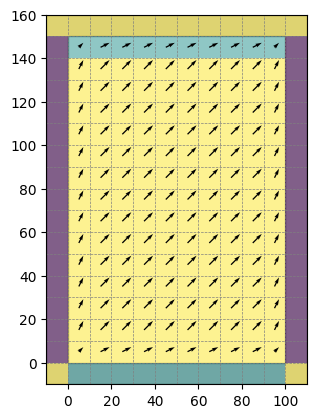

In [3]:
fig, ax = plt.subplots()
grid_plot.cells(ax, True)
vel_plot.pcolormesh(vel, "v", ax=ax, boundary=True, alpha=0.5)
vel_plot.quiver(vel, ax=ax)
ax.set_aspect('equal', 'box')